In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

[]

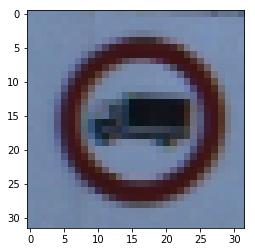

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(X_test[0])
plt.plot()

In [30]:
img = X_test[0].mean(axis=(2))
rows,cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),10,1)
dst = cv2.warpAffine(img,M,(cols,rows))

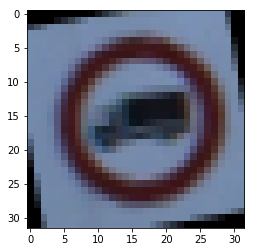

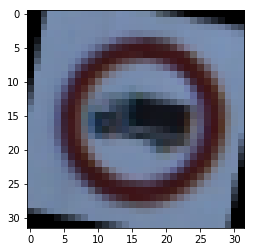

In [91]:
def rotate(img, direction):
    rows,cols = img.shape[0],img.shape[1]
    angle=10 if direction else -10
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    tmp=np.zeros_like(img)
    for i in range(img.shape[2]):
        tmp[:,:,i]=cv2.warpAffine(img[:,:,i],M,(cols,rows))
    
    return tmp

tmp=rotate(img,1)
plt.imshow(tmp)
plt.plot()
plt.show()

tmp=rotate(img,0)
plt.imshow(tmp)
plt.plot()
plt.show()

In [87]:
tmp.shape

(32, 32, 3)

In [60]:
def resize(img, side, where_cut):
    """
    Function for resize and crop image
    """
    tmp=None
    if side:
        tmp=cv2.resize(img,None,fx=1.2, fy=1, interpolation = cv2.INTER_CUBIC)[:32,:32]
    else:
        tmp=cv2.resize(img,None,fx=1, fy=1.2, interpolation = cv2.INTER_CUBIC)[:32,:32]
        
    if where_cut:
        return tmp[-32:,-32:]
    return tmp[:32,:32]

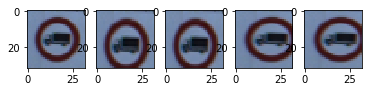

In [61]:
from itertools import product

f, ax = plt.subplots(1, 5)

ax[0].imshow(img)

for i,(side, where_cut) in enumerate(product([0,1],[0,1])):
    ax[i+1].imshow(resize(img,side,where_cut))

plt.show()

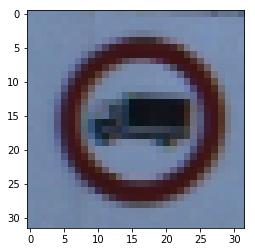

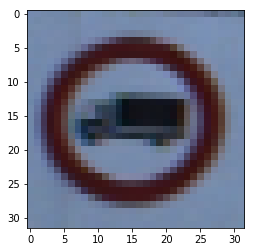

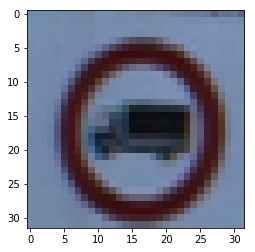

In [42]:
import cv2
import numpy as np
img = X_test[0]
plt.imshow(img)
plt.show()


res = cv2.resize(img,None,fx=1.1, fy=1, interpolation = cv2.INTER_CUBIC)[-32:,-32:]

plt.imshow(res)
plt.show()

res = cv2.resize(img,None,fx=1, fy=1.1, interpolation = cv2.INTER_CUBIC)[:32,:32]



plt.imshow(res)
plt.show()

In [9]:
t